<a href="https://colab.research.google.com/github/Darrenn231/MachineLearning/blob/main/ML_BA05_LAB1_2502001763.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df_raw = pd.read_excel("diabetes.xlsx")
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

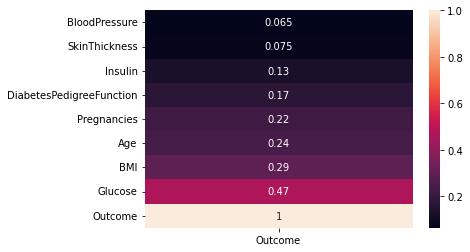

In [ ]:
corr = df_raw.corr()[["Outcome"]].sort_values(by = "Outcome")
sns.heatmap(corr, annot = True)

<Axes: >

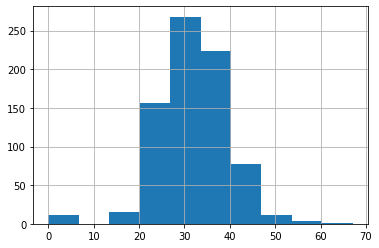

In [ ]:
df_raw["BMI"].hist()

<Axes: >

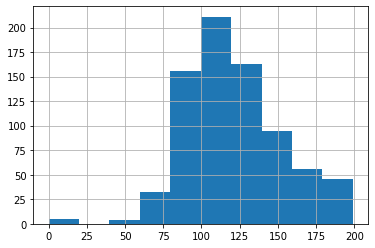

In [ ]:
df_raw["Glucose"].hist()

<Axes: >

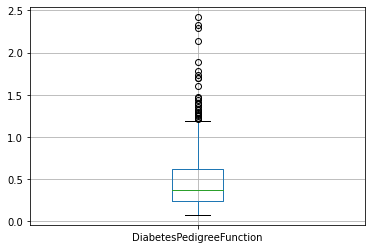

In [ ]:
df_raw.boxplot("DiabetesPedigreeFunction")

In [ ]:
print("Number of rows which contain 0 Glucose: ", df_raw["Glucose"].value_counts()[0])
print("Number of rows which contain 0 BLoodPressure: ", df_raw["BloodPressure"].value_counts()[0])
print("Number of rows which contain 0 SkinThickness: ", df_raw["SkinThickness"].value_counts()[0])
print("Number of rows which contain 0 BMI: ", df_raw["BMI"].value_counts()[0])

Number of rows which contain 0 Glucose:  5
Number of rows which contain 0 BLoodPressure:  35
Number of rows which contain 0 SkinThickness:  227
Number of rows which contain 0 BMI:  11


In [ ]:
df_clean1 = df_raw[df_raw["Glucose"] != 0]
df_clean2 = df_clean1[df_clean1["BloodPressure"] != 0]
df_clean3 = df_clean2[df_clean2["BMI"] != 0]

In [ ]:
df_clean = df_clean3.copy()
df_clean["SkinThickness"].replace(0, 21, inplace = True)
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,27.012431,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.716229,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_validation_testing = train_test_split(df_clean, test_size = 0.4, random_state = 99)
df_validation, df_testing = train_test_split(df_validation_testing, test_size = 0.5, random_state = 99)


x_train = df_train.drop('Outcome', axis = 1)
y_train = df_train['Outcome']

x_val = df_validation.drop("Outcome", axis = 1)
y_val = df_validation['Outcome']


x_test = df_testing.drop("Outcome", axis = 1)
y_test = df_testing['Outcome']

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(np.array(x_train), y_train)

y_pred_train = log_reg.predict(np.array(x_train))
y_pred_val = log_reg.predict(np.array(x_val))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.69      0.57      0.63        47

    accuracy                           0.78       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.77      0.78      0.77       145



In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(np.array(x_train), y_train)

y_pred_train = naive_bayes.predict(np.array(x_train))
y_pred_val = naive_bayes.predict(np.array(x_val))

In [ ]:
report = classification_report(y_val, y_pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        98
           1       0.56      0.62      0.59        47

    accuracy                           0.72       145
   macro avg       0.68      0.69      0.69       145
weighted avg       0.73      0.72      0.72       145



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_class = RandomForestClassifier()
rand_class.fit(np.array(x_train), y_train)

y_pred_train = rand_class.predict(np.array(x_train))
y_pred_val = rand_class.predict(np.array(x_val))


In [ ]:
report = classification_report(y_val, y_pred_val)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.69      0.57      0.63        47

    accuracy                           0.78       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.77      0.78      0.77       145



In [ ]:
7